# FIFA: Setting together your dream team

## Motivation

***About the dataset***

In this project we are working with a FIFA dataset that contains information and stats about 16 thousand professional football players in the computer game FIFA 2019. The computer game replicates the real life “Football universe”. This means that the dataset is highly accurate for analyzing and visualizing football data. 


***Why did you choose this dataset?***

Football is one of the biggest sport industries and is a cross national sport. Football fans are plentiful across the world and most of them are interested in not only their national players, but players of all nationalities. 


***What is your goal for the end user's experience?***

Football fans spend a lot of time discussing which player is better than another and what players should be included in the perfect team. We want to enable the user to design their dream-team. The user should be able to set different parameters (age, rating, value etc.) to find specific players. A player is chosen for a specific position and is selected from a plot that contains the best players that fulfill the different filters that the user has set. The formation of the team can be adjusted to get the most out of every player.

## Data cleaning

In this notebook, we will clean the data before sending it to Observable.

Import the basic packages:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from google.colab import files
import io

Load the data:

In [0]:
#FIFA 19 original dataset
uploaded = files.upload()

Saving fifa19.csv to fifa19.csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['fifa19.csv']))

Remove the irrelevant attributes from the data:

In [0]:
data=data.drop(columns=['Unnamed: 0','Potential', 'Wage', 'Special', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until', 
                   'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Preferred Foot', 'Jersey Number', 'Height', 'Weight'  ])

Let's have an initial look at the first 10 rows of data as well as displaying the dimensions:

In [0]:
display(data.head(10),data.shape)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Club,Club Logo,Value,Position,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,RF,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,ST,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,LW,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,RCM,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,LF,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€67M,RCM,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€80M,RS,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,79+5,79+5,84+5,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5,77.0,93.0,77.0,82.0,88.0,87.0,86.0,8

(18207, 66)

66 columns remain with 18207 players.
The dataset contains:
- Basic personal information such as `Name`, `Age` and `Nationality`
- URL-links to photos of the player's face, club logo and flag.
- An overall rating (1-100) representing the skill rating of the player's best position.
- Current `Club`
- `Value` (estimated transfer price)
- Best `position` on the football field (e.g. *ST* representing the position *Striker*)
- Ratings of each position on the football field (0-100) (e.g. `ST` representing the position *Striker*)
- Ratings of different skills (1-100) (e.g. `Dribbling`)


First part of the data cleaning is to look into which attributes have NaN entries:

In [0]:
null_counts = data.isnull().sum()
null_counts[null_counts > 0]
max(null_counts)

2085

2085 of the players have values of NaN. Many of these are due to goalkeepers, who are not able to play other positions than goalkeepers.

The goalkeepers are extracted from the following analysis and the visualisations, since they are a special kind of player, which is independantly chosen from the rest of the team and they have a different set of ratings.

We remove all players with NaN (including all goalkeepers).


In [0]:
data = data.dropna()
data.shape

(15926, 66)

15926 players remain.

From the data-head above we see that `Value` has units included (e.g. *€110.5M*) and the position ratings include bonuses (e.g. *88+2* instead of *90*).

Now we remove currency sign from `Value` and  enforce correct scaling i.e. thousand(K) or million(M)

In [0]:
# remove currency sign from value and enforce correct scaling i.e. thousand(K) or million(M)
M_mask = data['Value'].str.contains('M')
data['Value'] = data['Value'].str.extract(r'(\d+)')
data['Value'] = pd.to_numeric(data['Value'])
data.loc[~M_mask,'Value'] /= 10**3

The position ratings for each position include "+"-signs, which needs to be evaluated. For example *Messi's* ability to play as a striker is *88+2*, but should be evaluated to *90*

In [0]:
#Converting position ratings
for column in range(11,37):
    data[data.columns[column]]=data[data.columns[column]].map(lambda x: eval(x))

Let's look at the first 10 entries in the cleaned data and the new dimensions:

In [0]:
display(data.head(10),data.shape)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Club,Club Logo,Value,Position,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.0,RF,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77.0,ST,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.0,LW,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102.0,RCM,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93.0,LF,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,67.0,RCM,80,80,80,88,87,87,87,88,90,90,90,89,91,91,91,89,85,84,84,84,85,82,74,74,74,82,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,80.0,RS,92,92,92,91,92,92,92,91,90,90,90,89,84,84,84,89,74,73,73,73,74,71,68,68,68,71,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,51.0,RCB,76,76,76,73,74,74,74,73,74,74,74,75,78,78,78,75,84,87,87,87,84,87,90,90,90,87,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,77.0,ST,90,90,90,86,89,89,89,86,86,86,86,84,80,80,80,84,64,65,65,65,64,61,60,60,60,61,62.0,91.0,85.0

(15926, 66)

After cleaning the data:
- removing many irrelevant columns
- removing units from `Value`
- evaluating position ratings from the format "88+2" to "90".
- removing all rows with NaN entries (including all goalkeeper-players)

15926 players remain with 66 columns.

The clean dataset is downloaded below, and then uploaded here:

(https://gist.githubusercontent.com/Bernktt/37bec7745d7ce1de47715667831999c9/raw/4a25e3a7920d5dee3ec779013a36e0c90f1d56b6/fifa19_clean.csv), 

so it can be imported to the Observable notebook.

In [0]:
data.to_csv("fifa19_clean.csv",index=False)
files.download('fifa19_clean.csv')

## Basic stats

Let's look at some basic statistics of the dataset.

**Histograms of selected columns**

First of all, histograms of some basic columns:

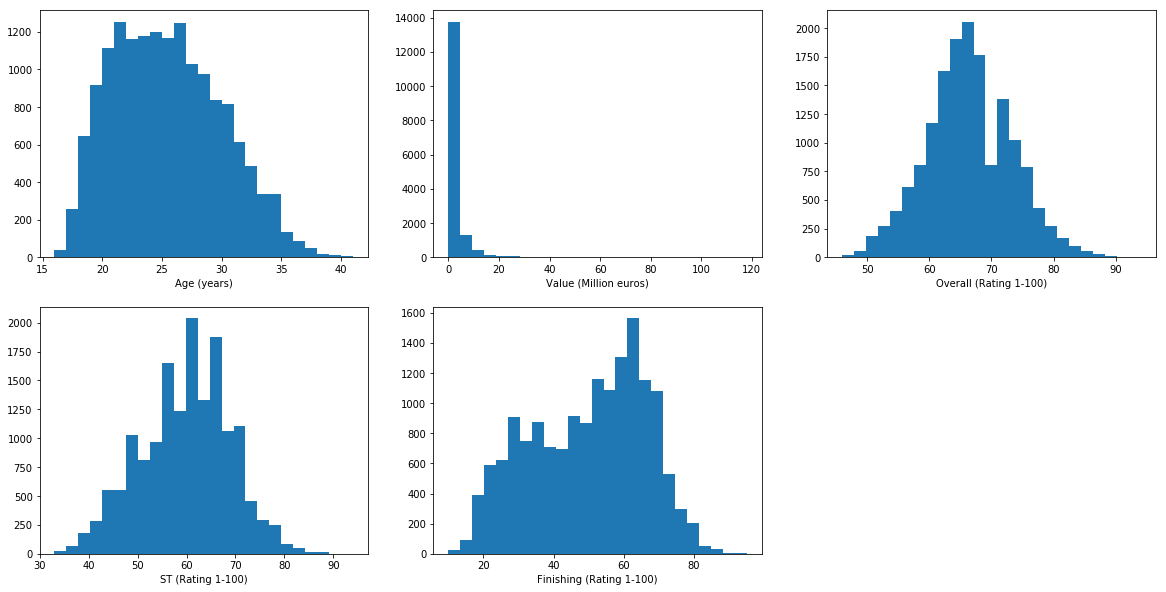

In [0]:
# histograms
selected_attrbs = ['Age','Value','Overall','ST','Finishing']
M = len(selected_attrbs)
plt.figure(figsize=(20,10))
u = np.floor(np.sqrt(M)); v = np.ceil(float(M)/u)
i = 0
units=[" (years)", " (Million euros)", " (Rating 1-100)", " (Rating 1-100)", " (Rating 1-100)"]
for attrb in selected_attrbs:
    attrb_data = data[attrb]
    plt.subplot(u,v,i+1)
    plt.hist(data[attrb],bins=25)
    plt.xlabel(attrb+units[i])
    i+=1
plt.show()

The `age` looks to be a right-skewed normal distribution, due to the fact that most players start as professional around the same age, while it is very different at what age they retire.

The `value` looks to be a power-law distribution, since a lot of players have very low values compared with the extremely few players that have a `value` above 100 millions euros.

The `Overall` rating looks to be a normal distribution with a mean around 65. 

`ST` is the position rating that represents the position *Striker*. The distribution looks similar to the one of `Overall`, but with a lower mean and wider spread. This is expected, because a very good *Striker*-player will have the same `Overall` and `ST`, while a defender will have a higher `Overall` than `ST`.

`Finishing` is a skill rating, which looks to have a mixed distribution, with one group with a mean around 30 and another group with a mean around 60. This is interesting, because it  represents two different classes of players: The ones, that are good at finishing (probably strikers and attacking midfielders) and the ones, that are not good at finishing (probably defenders and defensive midfielders). 

**Overall ratings vs Value**

It is interesting to see the relationship between `Overall` rating and the `Value`, since the users will desire to maximise `Overall` while keeping `Value` low for their dream team.



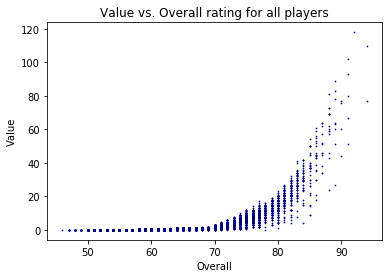

In [0]:
data.plot.scatter(x='Overall', y='Value', c='DarkBlue', s=0.5, title='Value vs. Overall rating for all players')

`Overall` rating is clearly correlated with the `value` of the player, which makes sense. But the plot makes it evident that there is a way bigger variance in price between players with higher ratings, than the players with lower ratings. The gradient also looks to increase with `overall`, so a difference of rating means more for the `value` of the better players.

## Data analysis

**Correlation between position ratings**

The position ratings include 26 different positions on the football field, but some of them are redundant. Let's have a look at the correlation between the positions.

In [0]:
def correlationPlot(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap='plasma')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

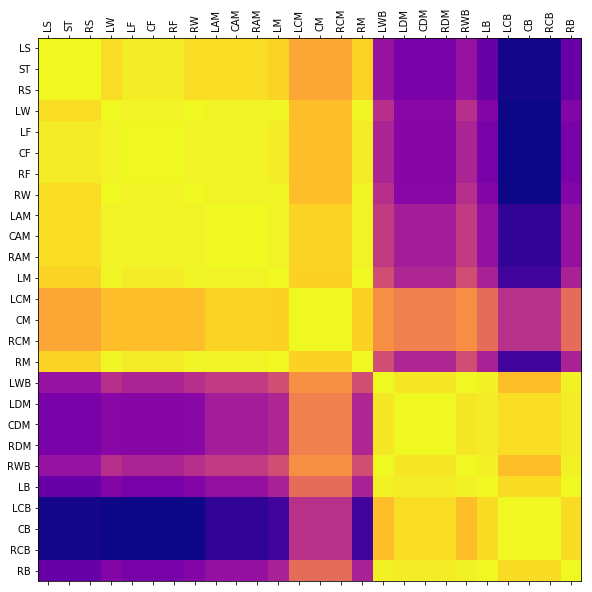

In [0]:
correlationPlot(data.iloc[:,11:37])

We see that some positions are completely equal (e.g. `LCB` (*Left Centre Back*), `CB` (*Centre Back*) and `RCB` (*Right Centre Back*).

For the vizualisations in Observable, only the unique positions will be included, which will split the football field into 14 areas. See the plot below for the selected positions.

Note however, that the remaning positions are still kept, because some players have a prefered `position` of one the excluded positions, even though they can play just as well in one of the included positions. We will use the `position` to help the user to put the players in their optimal area on the football field.

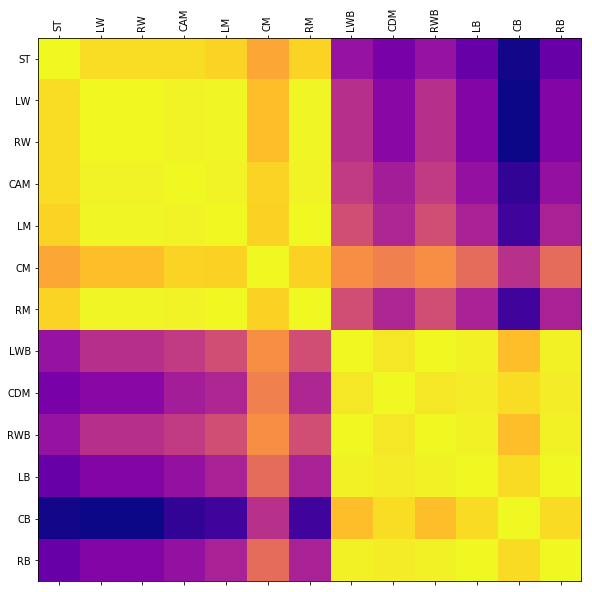

In [0]:
correlationPlot(data.iloc[:,[12,14,18,20,22,24,26,27,29,31,32,34,36]])

The Observable notebook is very much user-driven, so the data analysis depends on the interest of the specific user. The notebook can give many insights into the data. 

**First of all, the histograms** of `Overall` ratings and of the top `nationalities` are interesting to look at while changing the filters, in order to understand the full spectre of data.

Some interesting findings are:
- There are only 20 Danish players with an `Overall` rating of more than 75.
- For 1 million euros, you can only find a player with `Overall` of 75 or less.
- France have the most players (16) with an `Overall` of at least 80 and an age of maximum 23.
- 225 players have an `Overall` of at least 80, but a value of no more than 20 million euros. 37 of them are from Spain.
- The older players generally have higher `Overall` than the younger players.
- Brazil and Spain together have 27 out of the 98 players with an `Overall` of at least 85.


**Meanwhile, the scatter-plot and the team-view** are interesting for an in-depth analysis of each selected player, especially when using the filters.

The findings are very specific to each player and the selected team. Some examples of interesting findings are:
- Cristiano Ronaldo is the best *Striker*
- W. Ndidi is the best *CB* (Centre Back) under 22 years even though he is only the 5th most expensive.
- N. Kanté is the best French player for the position *RB* (Right Back) with a rating of 87, but his best position is *CDM* (Central Defensive Midfielder) with a rating of 90.
- Selecting the supposedly best dream team of only Danish players in a classic 4-4-2 formation gives a team rating of 795 and a total value of 203 million euros.

## Genre

The genre for our data story is an interactive partioned poster in a notebook format. Ideally, the filter-settings, the histograms, the scatterplot and the team-view should all be within the same view, like on a large poster, but Observable has some limitations, since it is cell-based, which can only appear on the fixed list from top to bottom.

Our narrative visualization includes the following: 


###Visual narrative

**Visual structuring:**

- *Consistent Visual Platform*: The layout of the notebook is the same, showing the same plots, but with different content depending on the filters and the players chosen by the user.

**Highlightning:**  

- *Close-up*: Clicking on a player in the team view gives additional information of the player (age, value and best position). Likewise, more information of a player appears when mousing over the corresponding football symbol in the scatterplot.

- *Feature Distinction*: The user is able to choose the y-axis in the scatterplot.

- *Motion*: The user is able drag the players in the team view and thus change their position.

**Transition Guidance**: 

- *Object continuity*: When clicking on a player in the team view, the same player appears in the scatterplot. Moreover, the same color (cyan) is used in the two histograms to represent the players that are included in the filters.

###Narrative structure

**Ordering**: 

- *User directed path*: The process of setting the team is first linear by following the guide provided in the introduction in the Observable notebook. It is in reality however user directed, since the user can decide the kind of dreamteam to create and will set the remaining path in that direction.

**Interactivity:**

- *Hoover highlighting /details*: When hoovering above one of the football symbols in the scatter-plot, more details appear of the responding player.

- *Filtering*: The user can set filters of `Nationality`, `Age`, `Value` and `Overall`.

- *Explicit instruction*: The introduction explains how to use the notebook and presents a kind of tutorial by presenting challenges to the user. 

- *Stimulating default views*: Initially a random team is generated, which is already interesting to investigate, by dragging the players around to different positions in order to improve the team rating. The user will experience satisfaction when seeing the color of a player changing from red to green by dragging the player to a better position.

**Messaging**: 

- *Headlines*: The histograms have headlines.

- *Introductory text*: Each section of the notebook is introduced.

- *Multi-messaging*: The notebook presents information of both the entire population and the individual players in the scatter-plot, which both follow the applied filters.


## Visualizations

**Histogram of `Overall`**:

The first histogram shows the distribution of `Overall` for the entire dataset in grey and for the players included in the filters in cyan. 

The point of this histogram is to show how good the players within the filters are, compared with the remaining players. The histogram is, with the filters, itself interesting as the examples in the **Data analysis** section show. It is also interesting for the user as preparation for choosing the team below, because the user gets an idea of how many and what kind of players that are included in the filter, which will be used for choosing players later.


**Histogram of top countries**:

The histogram of the top countries is *not an actual histogram*, since `Nationality` is not a quantitative variable. It shows the number of players included in the filter from different countries. It does not however show all the countries, since this would be an overload of information. The countries are sorted by their number of players and a maximum of 27 (depending on the size of the screen) countries are displayed. This is practically solved by having the width of the plot depend on the number of included nationalities, so the plot expands into the invisible margin, when many countries are included.

Similarly to the first histogram, this plot is interesting in itself as the examples in the **Data analysis** section show. Meanwhile, it is also interesting for the user, when deciding what filters to use. For example if the user can see that with the filters applied, France has the most players, the user might get the idea of creating an entirely French team. When a specific country is chosen in the `Nationality`-filter, this histogram is of no interest, since it will just show the same number of players as the entire filter.

**Player view**

The player view is used within both the scatterplot and the team view.
The player view shows the players face, club logo, nationality flag, the selected position and the rating for this player in the selected position. The color of the two figures next to the face represent how good the player's rating is in this position compared with the player's rating in his natural position, so a more yellow or red color indicates that a different position would suit this player better. The shirt symbol next to the player's face shows the assigned shirt number of the selected player.

**Scatterplot**:

The content of the scatterplot depends on both the filters applied in the first part of the notebook and the player selected in the team view below the scatterplot. The player view shown in the top left corner shows the player selected in the team-view.  Information of the player's age, value and best position is displayed to the right of the player view. The scatterplot shows the 50 best players for this position within the filters applied. The user can change y-axis by choosing from the drop-down menu. The default y-axis is the position rating for the selected position. When mousing over a football-symbol in the scatter-plot, a player view of that responding player is displayed below the selected player. By clicking on the football symbol, that player is selected for the team below.

The scatterplot is important for the user to choose the perfect player for the team. It gives an overview of the best players available for the selected position and gives the user the option of choosing exactly the desired measure, for example by choosing *Tackling* for the y-axis when looking for a defender. The x-axis shows the value of the player, since it is often a measure that the user wants to minimize. The player-views to the left of the scatterplot makes it easy to compare the selected player with the player of interest.

**Team view**

The team view shows a football field as background, which is hiddenly divided into different zones for different positions, which will seem natural for a football fan. When dragging a player, the position of that player will change and the player's rating will then be updated to the rating of the corresponding position. When a player is dragged, a hidden text appears where his face used to be, which guides the user to the best position on the field for this exact player. When clicking on (or after dragging) a player, that player will appear in the scatterplot, so he can be substituted with a different player. The gold medal symbol displays the rating and the value of the team. Below the gold medal symbol, a 2D waterfall plot is displayed, which is explained below.

The team view is the most important figure in the Observable notebook and is the result of the filtering and player-choosing above.  A major point of the team view is to change the positions of the players and thus the formation of the team, which will influence the players available in the scatterplot. In many cases the goal of the user is to optimize the rating of the team and minimize the value of the team, so these two essential measures are presented in the gold medal, which can be used to easily compare two different dream teams.


**2D waterfall plot**

The 2D waterfall plot is displayed next to the football field in the team view. The plot displays the two most important characteristics of the team and the players in the team: value and rating. Each rectangle in the plot represents a player in the team view with the corresponding shirt-number. The width of the rectangle shows the value of the player and the height shows the rating of the player in the current position. So by dragging players around the football field, the rating will change, but the value only changes when a player is substituted using the scatterplot. 

The point of the waterfall plot is to get an understanding of how much rating each player provides to the team compared with the value of the player. A player with a high width (value) but low height (rating) is less attractive than a player with low height (value) but high height (rating). The different dimensions of the 10 rectangle can thus give the user an idea of which players to replace in order to keep the total value low and rating high. The color of the rectangle corresponds to the color of the figures next to the players head, so the more green, the better the current position is for that player. In the waterfall plot it is easier to compare these colors than in the football field, so it is easier to identify which players that should be moved to a different position. The reason that a waterfall plot is chosen instead of a simple scatterplot is to promote the idea that the team is the sum of it's players, so the total value and rating is a result of all the players combined.

## Discussion

**Using images**

It worked surprisingly well to use the url-links to images of both face, club logo and flag for each player. The fact that the images had an invisible background improved the look of the player views, so the figures surrounding the faces could be partially hidden behind the face, creating a sort of 3D effect.

However, there are some players in the dataset, who have no face images (e.g. the player *Josué Chiamulera*, whose image-URL is *https://cdn.sofifa.org/players/4/19/230375.png*). For these players an empty picture frame appears, which is unfortunate. One solution would be to display the silhouette of a head, but this would require knowing whether the URL contains a picture or not, which is not available information.

**Mutable variables**

Using mutable variables turned out to be the solution of a great challenge in this project. The problem was that the team-view needed an *initial formation* as input, which was then changed within the team-view by dragging the players, and this *changed formation* should then overwrite the *initial formation*. Using `return` of the *changed formation* did not work, because this would require an update of *initial formation*, which did not run instantly, but needed a manual run of the updating cell. The solution was found to use a `mutable` *formation*, which was initially set as *initial formation*, but then overwritten inside the team view whenever a player was dragged. 

Similarly, the scatterplot reads the *current player* but replaces this player with a *new selected player*, so the players were also declared as `mutable`.

**User input**

Importing functions from "@jashkenas/inputs" worked very well for the filters: sliders, type number and drop-downs. These functions are very simple and elegant, but does however have some limitations. As an example, it would have made sense to have just one slider for minimum and maximum of age. With the implementation we chose, the maximum age can only go as low as the minimum age, but this relation also means that whenever the minimum age is changed, the maximum age is reset to 41.

We also wanted to create two buttons, to generate teams: 
- *Choose random team*, which would change all the players in the team view to 10 random players included in the filter. This would make sense as a user, because the initial random team is generated before the filters are applied, so this button would correct the random team, so it obeyed the filters.
- *Choose best players*, which would include the top 10 of players included in the applied filter sorted by `Overall`. This would make a good starting point when trying to set together the best possible team within the filter.

These buttons would work, such that the mutable variable *TeamPlayers* would be overwritten when the button was clicked. In our implementation this could not work with *Button* from "@jashkenas/inputs", because the mutable was overwritten whenever the filters were updated, even when the button was not clicked.

**Waterfall plot**

The waterfall plot turned out to be very hard to read and interpret for players with low values, because the rectangles become extremely narrow. One solution would be to adjust the x-axis to the chosen players, but this would prevent direct comparison of two saved dream teams. A different approach would be to convert the plot to a scatter-plot, where the players are not stacked, so the players can be compared internally. To still keep the impression of a total value and rating stacking up, two bars could be drawn next to the scatter-plot, which could be used to compare two different dream teams by the size of these two bars.

**Handling bugs/issues**

The current implementation allows multiple instances of the same player appearing in the same team. One way to avoid this would be to exclude the team-players from the options in the scatterplot. Another approach would be to still allow it, but display a warning when the team contains two identical players. Neither was implemented due to lack of time.

Another issue, which is not handled properly in the notebook, is the event of having multiple filters applied in such a way that **no players** are included in the filters. In this case, some error-messages appear. This is currently simply handled by a string appearing below the filters, warning of the issue.

**Position issues in data**

As explained in the **Data analysis**, there are more positions than the ones that the team view is handling. One problem with this, is that the displayed best `position` of a player sometimes describes a position, which is not possible to find in the team view. 

Another issue with the best `position` displayed for a player is the fact that this position not always is the position, where he actually has the highest rating. E.g. the player *P. Pogba*  has the `position` *RDM*, but his position rating of `RDM` is only 81, while his position rating of `CM` is 87. 

A third issue with the ratings is the fact that the `Overall` not always corresponds to the highest position rating of the player, which one would assume. As expected the `Overall` of *P. Pogba* is 87, but e.g. the player *K. Mbappé* has an `Overall` of 88, but a position rating as `RW` of 90.  

One solution to solve all the three issues above would be to:
- First, change the `position` of the player to be the position **among only the included positions**, where the player has the highest position rating. 
- Then, change the `Overall` rating to be equal to the position rating of the players `position`

This data misalignment was however realized too late in the process to be fixed.

**Ideas for improvement:**

One improvement for the user experience would be to add links to solutions of the three challenges presented in the introduction of the Observable notebook. It was surprisingly difficult to upload an svg somewhere, so we could include an URL with link to a picture of a solution.

Another idea for improvement would be to write the description of the applied formation in the team view. In football-terms the description 4-4-2 refers to a formation of 4 defenders, 4 midfielders and 2 attackers. This formation description could be generated using the positions of the players in the team.

A last idea for improvement would be to include more filters for the user to narrow down the players to choose from. Ideas include:
- Search by name
- Search by club
- Slider for rating in specific skill (choose the skill from a drop-down)

## Contributions

Christian took lead on:
- Data cleaning
- D3 plotting
- Implementation of mutable variables

Ferdinand took lead on:
- iPython notebook
- Filtering
- Histograms
- Observable introduction